[Reference](https://sandra-maria-machon.medium.com/6-statistical-terms-i-wish-i-knew-before-starting-my-first-data-science-job-5c454991ac1c)

# 1. Bootstrapping

In [1]:
import pandas as pd
import numpy as np

#Load Dataset (here we're crerating a sample dataframe)
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5, 6, 7, 8]})

# We define a function to compute the mean of a dataset
def mean_func(data):
    return np.mean(data)

# We set the number of bootstrap samples to 1000
n_bootstrap = 1000

#We generate bootstrap samples 
#by randomly selecting rows from 
#the original dataset with 
#replacement using the sample function

bootstrap_samples = []
for i in range(n_bootstrap):
    sample = df.sample(frac=1, replace=True)
    bootstrap_samples.append(sample)

# Compute means for each bootstrap sample
bootstrap_means = []
for sample in bootstrap_samples:
    mean = mean_func(sample)
    bootstrap_means.append(mean)

# Compute the 95% confidence interval 
# by calculating the 2.5th and 97.5th percentiles

alpha = 0.05
lower = np.percentile(bootstrap_means, alpha/2 * 100)
upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)

print(f"The mean is {np.mean(df)}")
print(f"The 95% confidence interval is [{lower}, {upper}]")

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


The mean is numbers    4.5
dtype: float64
The 95% confidence interval is [3.0, 6.125]


# 2. Student’s T-test

In [2]:
# import pandas as pd
# from scipy.stats import ttest_ind

# # Load data into two separate dataframes
# df1 = pd.read_csv('group1.csv')
# df2 = pd.read_csv('group2.csv')

# # Perform t-test
# # using the ttest_ind function from the scipy.stats library
# # The function returns the t-statistic and p-value of the test. 
# t_stat, p_value = ttest_ind(df1['variable'], df2['variable'])

# # Print results
# print(f"t-statistic = {t_stat}")
# print(f"p-value = {p_value}")

# if p_value < 0.05:
#     print("The means of the two groups are significantly different.")
# else:
#     print("There is no significant difference between the means of the two groups.")

# 3. Effect Size

In [3]:
import scipy.stats as stats
import numpy as np

# Create two groups of data
group1 = np.random.normal(10, 2, size=100)
group2 = np.random.normal(12, 2, size=100)

# Calculate Cohen's d
# which is the difference between the means 
# of the two groups divided by the pooled standard deviation. 
diff = group1.mean() - group2.mean()
pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
d = diff / pooled_std

# Print the results
print(f"Cohen's d: {d}")

Cohen's d: -1.2131571338884788


# 4. Power Analysis

In [4]:
import statsmodels.stats.power as smp

# Set the parameters
effect_size = 0.5
alpha = 0.05 #or the p value
power = 0.8 #desired power level for the study

# Perform power analysis
# using statsmodel function
# passing in the effect size, alpha level, and power level 
nobs = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Print the results
# which in this case would be 
# the sample size required to detect a medium-sized effect
print(f"Sample size required: {nobs}")

Sample size required: 63.765610587854056


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


# 5. Confidence Interval

In [5]:
import numpy as np
import statsmodels.stats.api as sms

# Example data
data = np.array([2, 4, 6, 8, 10])


# Calculate 95% confidence interval for the mean
# The default level of confidence is 95%. 
ci = sms.DescrStatsW(data).tconfint_mean()

# Print the confidence interval
# The tconfint_mean function returns a tuple 
# containing the lower and upper bounds of the confidence interval.
print("95% Confidence interval:", ci)

95% Confidence interval: (2.073513677044878, 9.926486322955121)


# 6. Central Limit Theorem

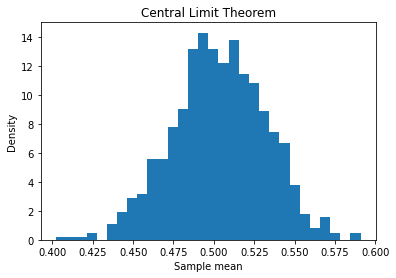

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a non-normal population distribution
pop = np.random.uniform(0, 1, size=10000)

# Calculate the means of many random samples
# and store the sample means in a list
sample_means = []
for i in range(1000):
    sample = np.random.choice(pop, size=100)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plot the distribution of sample means
plt.hist(sample_means, bins=30, density=True)
plt.xlabel("Sample mean")
plt.ylabel("Density")
plt.title("Central Limit Theorem")
plt.show()